<a href="https://colab.research.google.com/github/konradbachusz/tensorflow-getting-started/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"%tensorflow_version 1.x" 

'%tensorflow_version 1.x'

Instructions for updating:
non-resource variables are not supported in the long term


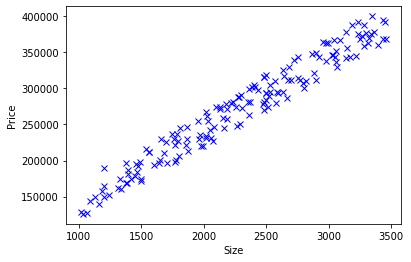

In [0]:
#
#   House_Price_Prediction.py
#
#    This is a very simple prediction of house prices based on house size, implemented 
#   in TensorFlow.  This code is part of Pluralsight's course "TensorFlow: Getting Started"
#

import tensorflow as tf
import numpy as np
import math
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
#  generation some house sizes between 1000 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

# Generate house prices from house size with a random noise added.
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)  

# Plot generated house and size 
plt.plot(house_size, house_price, "bx")  # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()



In [0]:
# you need to normalize values to prevent under/overflows.
def normalize(array):
    return (array - array.mean()) / array.std()

# define number of training samples, 0.7 = 70%.  We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

#  Set up the TensorFlow placeholders that get updated as we descend down the gradient
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

# Define the variables holding the size_factor and price we set during training.  
# We initialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")


# 2. Define the operations for the predicting values - predicted price = (size_factor * house_size ) + price_offset
#  Notice, the use of the tensorflow add and multiply functions.  These add the operations to the computation graph,
#  AND the tensorflow methods understand how to deal with Tensors.  Therefore do not try to use numpy or other library 
#  methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)


# 3. Define the Loss Function (how much error) - Mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)


# Optimizer learning rate.  The size of the steps down the gradient
learning_rate = 0.1

# 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)